# Angle Detection using Keras - Behaviour Cloning



## Dataset

Load the exported dataset from the simulator. 
The CSV file contains:
center,left,right,steering,throttle,brake,speed

(3 pictures, steering angle, throttle, brake and speed)

Images are all (320,160,3)

In [18]:
import pandas as pd
import numpy as np
import pickle
import math
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt

# Fix error with TF and Keras
tf.python.control_flow_ops = tf

print('Modules loaded.')

working_file = 'data/data-smooth-1try/driving_log.csv'

data = pd.read_csv(working_file)
#to Read data do: data.COLUMN.loc[INDEX] (example data.left.loc[2138])
#to get the size of this dataset: len(data.index)

print('Training data downloaded.')

Modules loaded.
Training data downloaded.


(160, 320, 3)
(70, 320, 3)


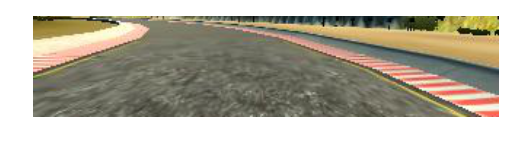

In [19]:
file_name = "data/data-smooth-1try/IMG/" + data.center.loc[1]

from PIL import Image

k = img.imread(file_name)
height, width = k.shape[:2]
print (k.shape)
k2 = k[60:130,:,:]

print (k2.shape)
plt.imshow(k2)
plt.axis('off')  # clear x- and y-axes
plt.show()
%matplotlib inline

## Load images into 3 datasets

left, center and right. all (160,320,3)


Access the dataset: data.COLUMN.loc[INDEX] (example data.left.loc[2138])

Lenght of dataset: len(data.index)

## Load the Data

Import picture per picture for a matrix.
To avoid memory issues, we are already normalizing each picture

In [21]:
#loading images
import matplotlib.image as img

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

cut_down = 60
cut_up = 130

##left
#left_image = np.zeros((len(data.index), 160,320,3))
#for i in range(0,len(data.index)):
#    file_name = "data/data-smooth-1try/IMG/" + data.left.loc[i]
#    left_image[i,:,:,:] = img.imread(file_name)
#print("Left Image: ",left_image.shape)

#Center


center_image = np.zeros((len(data.index), 70,320,3))
#center_image = np.zeros((100, 160,320,3))
for i in range(0,len(data.index)):
#for i in range(0,100):    
    file_name = "data/data-smooth-1try/IMG/" + data.center.loc[i]#data.center.loc[i+100]
    image = img.imread(file_name)
    center_image[i,:,:,:] = image[cut_down:cut_up,:,:]#normalize_grayscale(img.imread(file_name))
print("Center Image: ",center_image.shape)

##Right
#right_image = np.zeros((len(data.index), 160,320,3))
#for i in range(0,len(data.index)):
#    file_name = "data/data-smooth-1try/IMG/" + data.right.loc[i]
#    right_image[i,:,:,:] = img.imread(file_name)
#print("Right Image: ",right_image.shape)


print("All Images Loaded Sucessfully !")

Center Image:  (2139, 70, 320, 3)
All Images Loaded Sucessfully !


In [21]:
#Define the X_train and y_train

# X_train will be only defined as the center image for a while
X_train = center_image
# y_train will be the steering angles

y_train = np.zeros((len(data.index)))
#y_train = np.zeros((100))
for i in range(0,len(data.index)):
#for i in range(0,100):    
    y_train[i] = data.steering.loc[i] #data.steering.loc[i+100]

print(X_train.shape)
print(y_train.shape)

print('X_train and y_train loaded Sucessfuly !')

(2139, 160, 320, 3)
(2139,)
X_train and y_train loaded Sucessfuly !


## Preprocess the Data

1. Shuffle the data
2. Normalize the features using Min-Max scaling between -0.5 and 0.5
3. One-Hot Encode the labels

### Shuffle the data
Hint: You can use the [scikit-learn shuffle](http://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html) function to shuffle the data.

Shuffle Crashed Jupyter

In [22]:
# TODO: Shuffle the data
#from sklearn.utils import shuffle
#X_train, y_train = shuffle(X_train,y_train, random_state=0)

#print('Data shuffled.')

### Normalize the features
Hint: You solved this in [TensorFlow lab](https://github.com/udacity/CarND-TensorFlow-Lab/blob/master/lab.ipynb) Problem 1.

In [23]:
# TODO: Normalize the data features to the variable X_normalized

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )


#X_normalized = normalize_grayscale(X_train)
X_normalized = X_train
#print('Data normalized.')

### One-Hot Encode the labels
Hint: You can use the [scikit-learn LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html) function to one-hot encode the labels.

In [24]:
# TODO: One Hot encode the labels to the variable y_one_hot
from sklearn.preprocessing import OneHotEncoder

def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

y_one_hot = OHE_labels(y_train,1)

print('y One Hot Encoded.')

y One Hot Encoded.


## Train the Network

1. Compile the network using adam optimizer and categorical_crossentropy loss function.
2. Train the network for ten epochs and validate with 20% of the training data.

## Optimization
Congratulations! You've built a neural network with convolutions, pooling, dropout, and fully-connected layers, all in just a few lines of code.

Have fun with the model and see how well you can do! Add more layers, or regularization, or different padding, or batches, or more training epochs.

What is the best validation accuracy you can achieve?

In [25]:
# TODO: Build a model
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.normalization import BatchNormalization


# Reflections
# Dropout doesnt make sense for continous output
# As well as Softmax

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)


# Create the Sequential model
model = Sequential()


#1nd Layer - Normalization
model.add(BatchNormalization(input_shape=(70, 320, 3)))

#2nd Layer - Conv
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))

#3rd Layer - Conv
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))

#4rd Layer - Conv
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))

#5th Layer - Conv
model.add(Convolution2D(nb_filters, 3, 3, border_mode='valid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))

#6th Layer - Conv
model.add(Convolution2D(nb_filters, 3, 3, border_mode='valid'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Activation('relu'))

# 7st Layer - Add a flatten layer
model.add(Flatten())

## 8th Layer - Add a fully connected layer
model.add(Dense(100))
model.add(Activation('relu'))

# 9th Layer - Add a fully connected layer
model.add(Dense(50))
model.add(Activation('relu'))

## 10th Layer - Add a fully connected layer
model.add(Dense(10))
model.add(Activation('relu'))

# 11th Layer - Add a fully connected layer
model.add(Dense(1))
model.add(Activation('tanh'))

# TODO: Compile and train the model
model.compile('adam', 'mean_squared_error', ['mean_absolute_error'])
history = model.fit(X_train, y_train, nb_epoch=5, validation_split=0.2,batch_size=10,verbose=2)


Train on 1711 samples, validate on 428 samples
Epoch 1/5
371s - loss: 0.0050 - mean_absolute_error: 0.0451 - val_loss: 0.0078 - val_mean_absolute_error: 0.0529
Epoch 2/5
368s - loss: 0.0024 - mean_absolute_error: 0.0324 - val_loss: 0.0033 - val_mean_absolute_error: 0.0355
Epoch 3/5
366s - loss: 0.0012 - mean_absolute_error: 0.0239 - val_loss: 0.0023 - val_mean_absolute_error: 0.0304
Epoch 4/5
367s - loss: 9.7177e-04 - mean_absolute_error: 0.0218 - val_loss: 0.0026 - val_mean_absolute_error: 0.0318
Epoch 5/5
360s - loss: 8.0122e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0022 - val_mean_absolute_error: 0.0274


## como obter saida linear entre dois valores ?????????????

## Testing
Once you've picked out your best model, it's time to test it.

Load up the test data and use the [`evaluate()` method](https://keras.io/models/model/#evaluate) to see how well it does.

Hint 1: The `evaluate()` method should return an array of numbers. Use the [`metrics_names`](https://keras.io/models/model/) property to get the labels.

In [30]:
# TODO: Load test data
from sklearn.preprocessing import LabelBinarizer

X_test = np.zeros((1, 160,320,3))



X_test[0,:,:,:]= X_train[2120,:,:,:]
#y_test = data_test['labels']

# TODO: Preprocess data & one-hot encode the labels
#X_test = normalize_grayscale(X_test)
#y_one_hot_test = label_binarizer.fit_transform(y_test)
#y_one_hot_test = OHE_labels(y_test,43)

# Run a Prediction
print("Running Prediction ...")
predictions = model.predict(X_test)


print(predictions)
print("Finished")

print (y_train[2120])

Running Prediction ...
[[-0.02572508]]
Finished
-0.02248289


In [31]:
#Saving
#from: http://machinelearningmastery.com/save-load-keras-deep-learning-models/
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [3]:
#Loading Model
from keras.models import model_from_json
import numpy as np

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

loaded_model.compile('adam', 'mean_squared_error', ['mean_absolute_error'])

# TODO: Load test data
from sklearn.preprocessing import LabelBinarizer

X_test = np.zeros((1, 160,320,3))



X_test[0,:,:,:]= X_train[2120,:,:,:]
#y_test = data_test['labels']

# TODO: Preprocess data & one-hot encode the labels
#X_test = normalize_grayscale(X_test)
#y_one_hot_test = label_binarizer.fit_transform(y_test)
#y_one_hot_test = OHE_labels(y_test,43)

# Run a Prediction
print("Running Prediction ...")
predictions = loaded_model.predict(X_test)


print(predictions)
print("Finished")

print (y_train[2120])

Loaded model from disk


NameError: name 'X_train' is not defined